# Cálculo de probabilidad


## Propiedades de la probabilidad

<ol><li>
    $$0\leq p(A) \leq 1$$
</li>
<li>La probabilidad de un evento del que tenemos total certeza es 1.
    $$p(A) = 1$$
</li>
<li> Si el evento A y el evento B son mutuamente excluyentes, entonces
    $$p(A\cup B) = p(A) + p(B)$$
</li>
</ol>

## Teoría de conjuntos

**Unión:** La unión de varios eventos simples crea un evento compuesto que ocurre si uno o más de los eventos ocurren. La unión de A y B se escribe $A\cup B$ y significa "Ya sea A o B, o ambos A y B".

**Intersección:** La intersección de dos o más eventos simples crea un evento compuesto que ocurre sólo si ocurren todos los eventos simples. La intersección de A y B se escribe $A\cap B$ y significa "A y B".

**Complemento:** El complemento de un evento significa todo en el espacio de muestreo que no es ese evento. El complemento del evento E se escribe como $E^{c}$.

**Conjuntos mutuamente excluyentes:** Si los eventos no pueden ocurrir juntos, son mutuamente excluyentes.

In [35]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

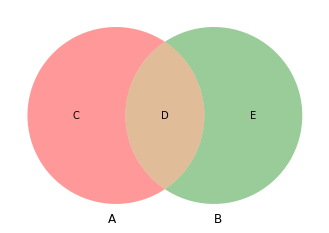

In [52]:
diagram = venn2((10, 10, 5))
diagram.get_label_by_id("10").set_text("C")
diagram.get_label_by_id("11").set_text("D")
diagram.get_label_by_id("01").set_text("E")

## Operaciones con conjuntos

Para unión de conjuntos mutuamente excluyentes:

$$P(A\cup B) = p(A) + p(B)$$

Para conjuntos no mutuamente excluyentes:

$$P(A\cup B) = p(A) + p(B) - p(A\cap B)$$

Intersección de eventos independientes:

$$p(A\cap B) = p(A)*p(B)$$

**Probabilidad condicional:** la probabilidad de algún evento A, dado que otro evento B ha ocurrido.

Intersección de eventos no independientes:

$$p(A\cap B) = p(A)*p(B|A)$$

### ¿Hay 'reciprocidad' en la prob condicional?

¿Es cierto que $P(B|A) = P(A|B)$?

**Tarea moral:** Revisar deducción de Teorema de Bayes

## Teorema de Bayes

$$P(B|A) = P(A|B)*\frac{P(B)}{P(A)}$$

### Ejemplo y matriz de confusión

En una población de 1000 individuos, supongamos que el 1% sufre COVID, y el resto está bien. Escogiendo un individuo al azar:
$$P(enfermo) = 0.01$$
$$P(sano) = 0.99$$

Supongamos que aplicando una prueba a una persona que no tiene COVID, hay una posibilidad del 1% de conseguir un falso positivo, esto es:
$$P(+|sano) = 0.01$$
$$P(-|sano) = 0.99$$

Supongamos que aplicando la prueba a una persona que tiene COVID, hay una posibilidad del 1% de un falso negativo, esto es:
$$P(-|enfermo) = 0.01$$
$$P(+|enfermo) = 0.99$$

La fracción de individuos en el grupo que están sanos y dan negativo (Bayes):
$$P(sano\cap -) = P(sano)*P(-|sano) = 0.99*0.99 = 0.9801$$

La fracción de individuos en el grupo que están enfermos y dan positivo:
$$P(enfermo\cap +) = P(enfermo)*P(+|enfermo) = 0.01*0.99 = 0.0099$$

La fracción de individuos en el grupo que dan falso positivo:
$$P(sano\cap +) = P(sano)*P(+|sano) = 0.01*0.99 = 0.0099$$

La fracción de individuos en el grupo que dan falso negativo:
$$P(enfermo\cap -) = P(enfermo)*P(-|enfermo) = 0.01*0.01 = 0.0001$$

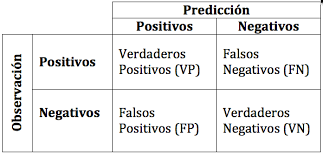

## Números pseudo-aleatorios

Cualquier lenguaje de programación tiene una función random, que cuando la llamamos nos devuelve un número pseudo-aleatorio entre 0 y 1. La distribución numérica entre 0 y 1 es uniforme.

In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

In [7]:
#Cada vez que ejecutamos este código obtenemos un número distinto:
random.random()

0.9892722220993061

Se tienen otras funciones que siguen una distribución uniforme:

<ol><li>random.randint(a,b) devuelve un número entero entre a y b (inclusive)
    </li>
    <li>random.choice(lista) devuelve un elemento de lista (que debe ser una lista, cadena de caracteres, conjunto...)
    </li></ol>

In [9]:
for i in range(10):
    print (random.randint(5,20))

17
6
5
8
18
7
5
14
19
17


In [10]:
for i in range(10):
    print(random.choice('ABCDE ?I'))

B
I
A
E
E
D
D
A
E
B


## Semilla aleatoria

In [14]:
#Si cambias la semilla, las elecciones cambian, pero con la misma semilla
#obtenemos los mismos resultados
random.seed(12345678)
for i in range(5):
    print (random.random())
for i in range(5):
    print (random.randint(1,10))
for i in range(5):
    print(random.choice('ABCDE'))

0.7202671550185803
0.6330310001166692
0.22877255649315598
0.25254569034434393
0.6060686820396118
10
9
2
6
2
B
C
A
D
A


### Ejemplo

Se tienen dos urnas, y cada una de ellas contiene un número diferente de bolas blancas y rojas:

<ol><li>Primera urna, U1: 3 bolas blancas y 2 rojas</li>
<li>Segunda urna, U2: 4 bolas blancas y 2 rojas</li></ol>
Se realiza el siguiente experimento aleatorio: Se tira una moneda al aire y si sale cara se elige una bola de la primera urna, y si sale cruz de la segunda. ¿Cuál es la probabilidad de que salga una bola blanca?. (sol = 19/30)

Solución exacta:
$$P(bola\,blanca) = \frac{1}{2}\frac{3}{5} + \frac{1}{2}\frac{4}{6} = \frac{19}{30}$$

In [15]:
def prueba():
    caja = random.randint(1,2)
    if caja == 1:
        return random.choice('BBBRR')
    else:
        return random.choice('BBBBRR')

In [16]:
for j in range(10):
    bola = prueba()
    print(bola)

R
R
R
R
B
B
R
R
B
B


In [17]:
def blanca(bola):
    if bola=='B':
        return True
    else:
        return False

In [19]:
random.seed(12345) 
N = 1000
bola = [prueba() for _ in range(N)]
proba = sum(blanca(i) for i in bola)/N
print('Probabilidad aproximada de bola blanca:', proba)
print('Probabilidad real de bola blanca:', 19/30)

Probabilidad aproximada de bola blanca: 0.631
Probabilidad real de bola blanca: 0.6333333333333333


## Ejemplo

Una urna contiene 5 bolas numeradas 1,2,3,4 y 5. Calcular la probabilidad de que al sacar 2 bolas con reposición y que la suma de los puntos sea impar.


In [21]:
lista = range(1,6)

def prueba1():
    bola1 = random.choice(lista)
    bola2 = random.choice(lista)
    return [bola1, bola2]

In [22]:
prueba1()

[5, 4]

In [23]:
def suma(bolas):
    return sum(bolas)%2 == 1

In [24]:
random.seed(12345) #Prueba a cambiar la semilla: la aproximación cambia 
N = 1000
muestra = [prueba1() for _ in range(N)]
prob = sum(suma(e) for e in muestra)/N
print('Probabilidad aproximada de que la suma de los puntos sea impar:', prob)

Probabilidad aproximada de que la suma de los puntos sea impar: 0.487
